# Machine Learning Homework - Exoplanet Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the CSV File

In [2]:
# Read the csv file into a pandas DataFrame
cumulative = pd.read_csv('Resources/cumulative.csv')
cumulative.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


### Explore the file

In [3]:
cumulative.shape

(9564, 50)

In [4]:
cumulative.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [5]:
cumulative["koi_disposition"].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [6]:
cumulative["koi_pdisposition"].unique()

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [7]:
cumulative["kepid"].unique()

array([10797460, 10811496, 10848459, ..., 10128825, 10147276, 10156110],
      dtype=int64)

In [8]:
cumulative["koi_period"].unique()

array([ 9.48803557, 54.4183827 , 19.89913995, ...,  1.73984941,
        0.68140161,  4.85603482])

In [9]:
cumulative["koi_depth"].isnull().sum()

363

In [10]:
cumulative["koi_srad"].isnull().sum()

363

In [11]:
cumulative["koi_steff"].isnull().sum()

363

In [12]:
cumulative["kepler_name"].isnull().sum()

7270

In [13]:
cumulative["kepoi_name"].value_counts()

K00737.01    1
K06174.01    1
K07618.01    1
K00619.01    1
K03245.01    1
            ..
K03665.01    1
K02107.01    1
K06001.01    1
K02450.01    1
K06957.01    1
Name: kepoi_name, Length: 9564, dtype: int64

### After Exploring the CSV and reading the documentation

* The kepler_name have some values as NaN, so the better id/name for each planet is kepoi_name column
* koi_period - Orbital Period (days)- The interval between consecutive planetary transits
* koi_depth - Transit Depth (parts per million) - The fraction of stellar flux lost at the minimum of the planetary transit
* koi_srad - Stellar Radius (solar radii) - The photospheric radius of the star
* koi_steff - Stellar Effective Temperature (Kelvin) - The photospheric temperature of the star

https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

In [14]:
# Create a new DF with only some important columns
exoplanets_df = cumulative[["kepid",
                            "kepoi_name",
                            "kepler_name",
                            "koi_disposition",
                            "koi_pdisposition",
                            "koi_score",
                            "koi_period",
                            "koi_depth",
                            "koi_srad",
                            "koi_steff"]]
exoplanets_df.shape

(9564, 10)

In [15]:
exoplanets_df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_depth,koi_srad,koi_steff
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,615.8,0.927,5455.0
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,874.8,0.927,5455.0
2,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,10829.0,0.868,5853.0
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,8079.2,0.791,5805.0
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,603.3,1.046,6031.0


In [16]:
# Drop rows with NaN value from the specific columns
exoplanets_df = exoplanets_df.dropna(subset=["koi_depth","koi_srad","koi_steff","koi_score"])
exoplanets_df.shape

(7995, 10)

### polynomial regression, multiple regression
#### First we try with koi_score vs [ "koi_period" , "koi_depth", "koi_srad", "koi_steff","koi_pdisposition"]

In [17]:
# Use Pandas get_dummies to convert categorical data from koi_pdisposition
exoplanets_df = pd.get_dummies(exoplanets_df, columns=["koi_pdisposition"])
exoplanets_df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_score',
       'koi_period', 'koi_depth', 'koi_srad', 'koi_steff',
       'koi_pdisposition_CANDIDATE', 'koi_pdisposition_FALSE POSITIVE'],
      dtype='object')

In [18]:
# Drop extra column and rename the one that we kept
exoplanets_df = exoplanets_df.drop(columns=["koi_pdisposition_FALSE POSITIVE"])
exoplanets_df = exoplanets_df.rename(columns={
    "koi_pdisposition_CANDIDATE": "koi_pdisposition"
})
exoplanets_df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_score',
       'koi_period', 'koi_depth', 'koi_srad', 'koi_steff', 'koi_pdisposition'],
      dtype='object')

In [19]:
exoplanets_df["koi_score"].isnull().sum()

0

### Here starts the model, asigning variables to check if it fits

In [20]:
# Asign data and target

X = exoplanets_df[["koi_period" , "koi_depth", "koi_srad", "koi_steff"]]
y = exoplanets_df["koi_pdisposition"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (7995, 4) (7995, 1)


In [21]:
X.head()

,koi_period,koi_depth,koi_srad,koi_steff
0,9.488036,615.8,0.927,5455.0
1,54.418383,874.8,0.927,5455.0
2,19.899140,10829.0,0.868,5853.0
3,1.736952,8079.2,0.791,5805.0
4,2.525592,603.3,1.046,6031.0


In [22]:
# Split the sample to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [24]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [25]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

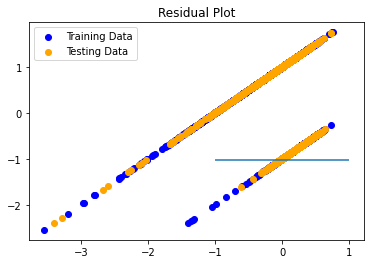

In [26]:
# Make predictions using a fitted model

predictions = model.predict(X_test_scaled)

model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=y_train_scaled.min(), xmin=y_train_scaled.min(), xmax=y_train_scaled.max())
plt.title("Residual Plot")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8770916548464863, R2: 0.12300190457923421
